In [15]:
#Задача 1
#Даны значения зарплат из выборки выпускников:
#100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
#Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, 
#среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
#Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.
salary = (100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150)
new_f = open("salary_data.txt", "w", encoding='utf-8')
input_text = ['money', '\n']
for i in range(len(salary)):
    input_text.extend([str(salary[i]), '\n'])
new_f.writelines(input_text)
new_f.close()

In [22]:
import pandas as pd
import csv
import numpy as np
df = pd.read_csv('salary_data.txt', encoding = 'utf-8')
print(df.head(10))
m_x = df['money'].sum() / df['money'].count()
print(f'Мат.ожидание = {m_x}')
print(df['money'].mean())
sigma_x = np.sqrt(((df['money'] - m_x)**2).sum() / df['money'].count())
print(f'Среднеквадратичное отклонение = {sigma_x}')
print(df['money'].std(ddof=0))
var_x = ((df['money'] - m_x)**2).sum() / df['money'].count()
print(f'Смещенная дисперсия = {var_x}')
print(df['money'].var(ddof=0))
var_x_nmoved = ((df['money'] - m_x)**2).sum() / (df['money'].count() - 1)
print(f'Немещенная дисперсия = {var_x_nmoved}')
print(df['money'].var(ddof=1))

   money
0    100
1     80
2     75
3     77
4     89
5     33
6     45
7     25
8     65
9     17
Мат.ожидание = 65.3
65.3
Среднеквадратичное отклонение = 30.823854398825596
30.823854398825596
Смещенная дисперсия = 950.11
950.11
Немещенная дисперсия = 1000.1157894736842
1000.1157894736842


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


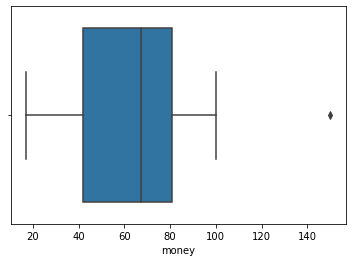

Первый квартиль 42.0
Третий квартиль 81.0
Интерквартильное расстояние 39.0
Значение 150 - выброс


In [30]:
#Задача 2
#Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. 
#Найти выборсы в выборке, используя для этого "усы" из boxplot. 
#В этой задаче можно использовать статистические функции.
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['money'], orient='x')
plt.show()
qv_1 = df['money'].quantile(0.25)
qv_3 = df['money'].quantile(0.75)
inter_qv = df['money'].quantile(0.75) - df['money'].quantile(0.25)
print(f'Первый квартиль {qv_1}')
print(f'Третий квартиль {qv_3}')
print(f'Интерквартильное расстояние {inter_qv}')
for money_ in df['money']:
    if (money_ < qv_1 - (1.5*inter_qv)) or (money_ > qv_3 + (1.5*inter_qv)):
        print(f'Значение {money_} - выброс')

In [31]:
#Задача 3
#В университет на факультеты A и B поступило равное количество студентов, 
#а на факультет C студентов поступило столько же, сколько на A и B вместе. 
#Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. 
#Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. 
#Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
#Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#Считая, что событие А - студент сдал сессию, В - студент учится на определенном факультете.
#Применим формулу полной вероятности:

p_general = 0.8 * 0.25 + 0.7 * 0.25 + 0.9 * 0.5

#Апостериорные вероятности сдачи экзамена студентом факультета:

p_A_after = 0.8 * 0.25
p_B_after = 0.7 * 0.25
p_C_after = 0.9 * 0.5

#Вероятность того, что сдавший студент учится на определенном факультете:

p_success_A = 0.25 * p_A_after / p_general
p_success_B = 0.25 * p_B_after / p_general
p_success_C = 0.5 * p_C_after / p_general

print(f'а) Вероятность того, что сдавший студент учится на факультете А: {p_success_A}')
print(f'б) Вероятность того, что сдавший студент учится на факультете B: {p_success_B}')
print(f'в) Вероятность того, что сдавший студент учится на факультете C: {p_success_C}')

а) Вероятность того, что сдавший студент учится на факультете А: 0.060606060606060615
б) Вероятность того, что сдавший студент учится на факультете B: 0.05303030303030303
в) Вероятность того, что сдавший студент учится на факультете C: 0.27272727272727276
